In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from util import get_multiFrames

from scipy.optimize import curve_fit
from scipy.special import i0, gamma
from numpy import exp, sin, cos


def vonmise_derivative(xdata, a, kai):
    xdata = xdata / 75 * np.pi
    return - a / (i0(kai) * 2 * np.pi) * exp(kai * cos(xdata)) * kai * sin(xdata) # Derivative of vonmise formula

def CurvefitFunc(x, y, func=vonmise_derivative, init_vals=[-25, 1], bounds_input = ([-60,1],[60, 2])):
        best_vals, covar = curve_fit(func, x, y, p0=init_vals, bounds = bounds_input)
        return best_vals

def VonMise_fitting(x, y, func=vonmise_derivative, init_vals=[-25, 1],  bounds_input = ([-60,1],[60,2])):
        best_vals = CurvefitFunc(x, y, init_vals=init_vals, bounds_input = bounds_input)

#         if self.bootstrap:
#             OutA = [] # Output a array, store each trial's a
#             outSlope = []
#             outIntercept = []
#             bsSize = int(1.0 * len(x))
#             for i in range(self.bsIter):
#                 RandIndex = np.random.choice(len(x), bsSize, replace=True) # get randi index of xdata
#                 xdataNEW = [x[i] for i in RandIndex] # change xdata index
#                 ydataNEW = [y[i] for i in RandIndex] # change ydata index
#                 try:
#                     temp_best_vals = self.CurvefitFunc(xdataNEW, ydataNEW, init_vals=init_vals, bounds_input=bounds_input)
#                     new_x = np.linspace(-x_range, x_range, 300)
#                     new_y = [vonmise_derivative(xi,temp_best_vals[0],temp_best_vals[1]) for xi in new_x]
#                     if new_x[np.argmax(new_y)] > 0: 
#                         OutA.append(np.max(new_y))
#                     else: 
#                         OutA.append(-np.max(new_y))
                    
# #                     poly1d_fn, coef = getRegressionLine(xdataNEW, ydataNEW, self.peak_x)
# #                     outSlope.append(coef[0])
# #                     outIntercept.append(coef[1])
#                 except RuntimeError:
#                     pass
#             print("bs_a:",round(np.mean(OutA),2),"	95% CI:",np.percentile(OutA,[2.5,97.5]))
#             self.bootstrap_values = OutA  ###ADD ME BACK YO
#             self.outSlope = outSlope
#             self.outIntercept = outIntercept
#             # np.save(self.result_folder + 'bootstrap.npy', OutA)
            
#         if self.permutation:
#             # perm_a, perm_b = repeate_sampling('perm', xdata, ydata, CurvefitFunc, size = permSize)
#             OutB = [] # Output a array, store each trial's a
#             perm_xdata = x
#             for i in range(self.permIter):
#                 perm_xdata = np.random.permutation(perm_xdata) # permutate nonlocal xdata to update, don't change ydata
#                 try:
#                     temp_best_vals = self.CurvefitFunc(perm_xdata, y, init_vals=init_vals, bounds_input=bounds_input) # permutation make a sample * range(size) times
#                     new_x = np.linspace(-x_range, x_range, 300)
#                     new_y = [vonmise_derivative(xi,temp_best_vals[0],temp_best_vals[1]) for xi in new_x]
#                     if new_x[np.argmax(new_y)] > 0: 
#                         OutB.append(np.max(new_y))
#                     else: 
#                         OutB.append(-np.max(new_y))
#                 except RuntimeError:
#                     pass
#             print("perm_a:",round(np.mean(OutB),2),"	90% CI:",np.percentile(OutB,[5,95]))

        print('Von Mise Parameters: amplitude {0:.4f}, Kai {1:.4f}.'.format(best_vals[0],best_vals[1]))
        return best_vals
        #outSlope, outIntercept
        #return OutA ###TAKE OUT OUTA YO , 


def save_DerivativeVonMisesFigure(xlabel_name, filename, x, y, x_range, best_vals):
        plt.figure()
        plt.ylim(-3, 3) #(-40, 40)
        #plt.title("Derivative Von Mises n Trials Back")
        plt.xlabel(xlabel_name)
        plt.ylabel('Error on Current Trial')
        plt.plot(x, y, marker ='o', color= '#808080', ls = '', alpha=0.5, markersize=7, markeredgewidth=0.0)
        new_x = np.linspace(-x_range, x_range, 300)
        new_y = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in new_x]
        second_x = np.linspace(-x_range, x_range, 147)
        DoVM_values = [vonmise_derivative(xi,best_vals[0],best_vals[1]) for xi in second_x]
#         DoVM_values = DoVM_values
        plt.plot(new_x, new_y, 'k-', linewidth = 4)
    
        df = pd.DataFrame({'DoVM':np.array(DoVM_values)})
        df.to_csv('AverageFit_Output.csv')
        #### RUNNING MEAN ####
#         RM, xvals = getRunningMean(x, y, halfway=x_range)
#         self.RM = RM
#         plt.plot(xvals, RM, label = 'Running Mean', color = 'g', linewidth = 3)
#         peak_x = (new_x[np.argmax(new_y)])
        # poly1d_fn, coef = getRegressionLine(x, y, peak_x)
        # xdata = np.linspace(-peak_x, peak_x, 100)
        # plt.plot(xdata, poly1d_fn(xdata), '--r', linewidth = 2)
        # print(coef[0], coef[1])
        if new_x[np.argmax(new_y)] > 0:
            plt.title("half amplitude = {0:.4f}, half width = {1:.4f}, total trials = {2:d}". format(np.max(new_y), new_x[np.argmax(new_y)], len(x)))
        else: 
            plt.title("half amplitude = {0:.4f}, half width = {1:.4f}, total trials = {2:d}". format(-np.max(new_y), -new_x[np.argmax(new_y)], len(x)))
        plt.savefig(result_folder + filename, dpi=1200)


        print('Half Amplitude: {0:.4f}'.format(np.max(new_y)))
        print('Half Width: {0:.4f}'.format(new_x[np.argmax(new_y)]))
        return DoVM_values       

 

 # Radiologists
    

In [ ]:
    
data = pd.read_csv("RunningAverage_radiologists.csv")

MEAN = data['MEAN']
RANGE = list(range(-73, 74))   

results_path = './results/'
result_saving_path = results_path + '/'
result_folder = result_saving_path
# os.mkdir(result_saving_path)
result_saving_path_figure ='Radiologist_VM_Average_Fit.pdf'

best_vals = VonMise_fitting(RANGE, MEAN, 73)        
save_DerivativeVonMisesFigure('Morph Difference from Previous', result_saving_path_figure, RANGE, MEAN, 73, best_vals)

# Naives

Von Mise Parameters: amplitude -10.6471, Kai 1.0000.
Half Amplitude: 1.9521
Half Width: 21.7291


[-0.04134617648880987,
 -0.0622003072607494,
 -0.08327185756472973,
 -0.10463356692728758,
 -0.12635837405697112,
 -0.14851942990521144,
 -0.17119008572341005,
 -0.19444385062297626,
 -0.2183543129045042,
 -0.24299501916605842,
 -0.26843930494094104,
 -0.2947600703670838,
 -0.32202949417068044,
 -0.3503186790759787,
 -0.3796972216543958,
 -0.41023269962529274,
 -0.44199006974689403,
 -0.47503096972076975,
 -0.5094129180112988,
 -0.5451884061889363,
 -0.5824038793805315,
 -0.62109860168927,
 -0.6613034050681145,
 -0.7030393221283578,
 -0.7463161057692479,
 -0.7911306413492559,
 -0.8374652603988973,
 -0.885285968601919,
 -0.9345406049340624,
 -0.9851569534166225,
 -1.0370408338649149,
 -1.0900742032149888,
 -1.1441133043946512,
 -1.1989869051380428,
 -1.2544946744683185,
 -1.3104057496026638,
 -1.3664575505523309,
 -1.4223549034569305,
 -1.4777695364459353,
 -1.5323400132870553,
 -1.585672169981975,
 -1.6373401175326683,
 -1.6868878700731924,
 -1.7338316512236416,
 -1.777662922705675,
 -

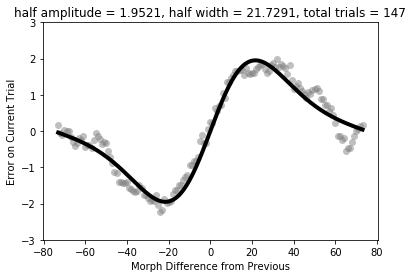

In [1]:
data = pd.read_csv("RunningAverage_naives.csv")

MEAN = data['MEAN']
RANGE = list(range(-73, 74))
        
       

results_path = './results/'
result_saving_path = results_path + '/'
result_folder = result_saving_path
# os.mkdir(result_saving_path)
result_saving_path_figure ='Naive_VM_Average_Fit.pdf'

best_vals = VonMise_fitting(RANGE, MEAN, 73)        
save_DerivativeVonMisesFigure('Morph Difference from Previous', result_saving_path_figure, RANGE, MEAN, 73, best_vals)